In [2]:
import commonmethods.image_modification as im

image = im.load_image_grayscale('5')

resized_image = im.resize_image(image, 1024)

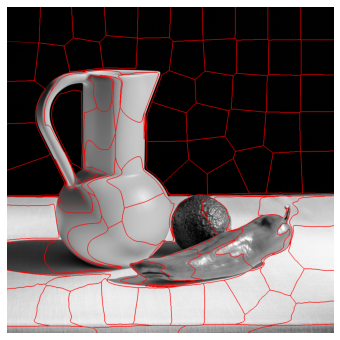

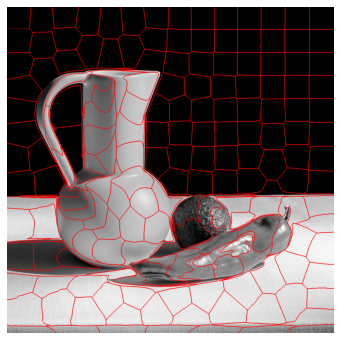

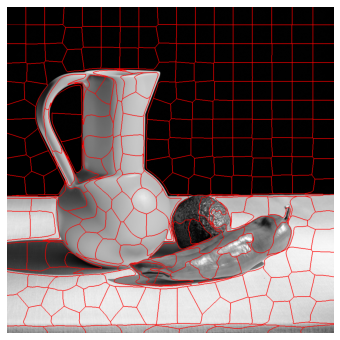

In [3]:
'''
Tutorial from: https://www.pyimagesearch.com/2014/07/28/a-slic-superpixel-tutorial-using-python/
'''
# import the necessary packages
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt
import argparse

# loop over the number of segments
for numSegments in (100, 200, 300):
    
    # apply SLIC and extract (approximately) the supplied number of segments
    segments = slic(resized_image, n_segments = numSegments, sigma = 5, start_label=0, compactness=.1)
    
    # show the output of SLIC
    fig = plt.figure("Superpixels -- %d segments" % (numSegments), figsize=(6, 6))
    ax = fig.add_subplot(1, 1, 1)
    ax.imshow(mark_boundaries(resized_image, segments, color=(1, 0, 0)))
    plt.axis("off")

# show the plots
plt.show()

Felzenszwalb number of segments: 527
SLIC number of segments: 216
Quickshift number of segments: 3012


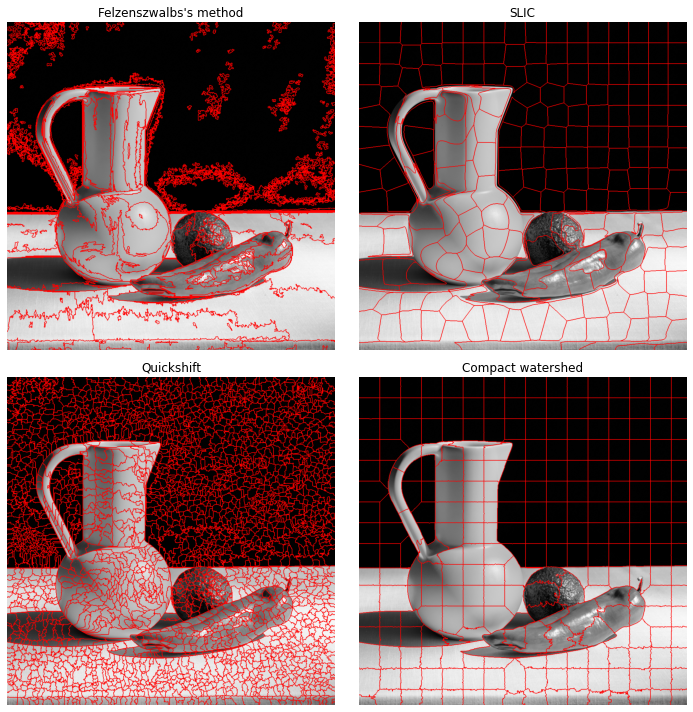

In [4]:
'''
Tutorial from: https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_segmentations.html
'''

import matplotlib.pyplot as plt
import numpy as np
import cv2

from skimage.data import astronaut
from skimage.color import rgb2gray
from skimage.filters import sobel
from skimage.segmentation import felzenszwalb, slic, quickshift, watershed
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float

segments_fz = felzenszwalb(resized_image, scale=100, sigma=0.5, min_size=50)

segments_slic = slic(resized_image, n_segments=250, compactness=.1, sigma=5, start_label=0)

grayscaled_color = cv2.cvtColor(resized_image, cv2.COLOR_GRAY2RGB)
segments_quick = quickshift(grayscaled_color, kernel_size=3, max_dist=6, ratio=0.5)

gradient = sobel(resized_image)
segments_watershed = watershed(gradient, markers=250, compactness=0.001)

print(f'Felzenszwalb number of segments: {len(np.unique(segments_fz))}')
print(f'SLIC number of segments: {len(np.unique(segments_slic))}')
print(f'Quickshift number of segments: {len(np.unique(segments_quick))}')

fig, ax = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)

ax[0, 0].imshow(mark_boundaries(resized_image, segments_fz, color=(1, 0, 0)))
ax[0, 0].set_title("Felzenszwalbs's method")
ax[0, 1].imshow(mark_boundaries(resized_image, segments_slic, color=(1, 0, 0)))
ax[0, 1].set_title('SLIC')
ax[1, 0].imshow(mark_boundaries(resized_image, segments_quick, color=(1, 0, 0)))
ax[1, 0].set_title('Quickshift')
ax[1, 1].imshow(mark_boundaries(resized_image, segments_watershed, color=(1, 0, 0)))
ax[1, 1].set_title('Compact watershed')

for a in ax.ravel():
    a.set_axis_off()

plt.tight_layout()
plt.show()

(-0.5, 1023.5, 1023.5, -0.5)

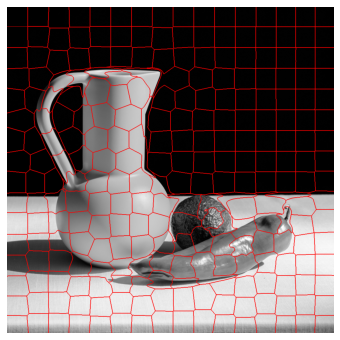

In [5]:
import matplotlib.pyplot as plt
from skimage.filters import sobel
from skimage.segmentation import mark_boundaries
from skimage.segmentation import slic

gradient = sobel(resized_image)
segments_slic_gradient = slic(gradient, n_segments=250, compactness=.1, sigma=5, start_label=0)

plt.figure(figsize=(6,6))
plt.imshow(mark_boundaries(resized_image, segments_slic_gradient, color=(1, 0, 0)))
plt.axis("off")

In [95]:
import commonmethods.image_modification as im
from matplotlib import pyplot as plt
import cv2

print(segments_slic)

[[  0   0   0 ...  15  15  15]
 [  0   0   0 ...  15  15  15]
 [  0   0   0 ...  15  15  15]
 ...
 [212 212 212 ... 214 214 214]
 [212 212 212 ... 214 214 214]
 [212 212 212 ... 214 214 214]]
